### Question 1: Practical Gradient Descent Implementation (20 marks) 

a)

In [77]:
def grad_descent(x0,alpha, n):
    def f(x):
        return x**2 - 6*x + 9
    
    def df(x):
        return 2*x - 6
    x=x0
    x_vals=[x]
    y_vals=[f(x)]
    for _ in range(n):
        gradient = df(x)
        x=x-alpha*gradient
        x_vals.append(x)
        y_vals.append(f(x))
    return  x_vals, y_vals

b)

In [78]:
import pandas as pd
x0=2
alpha=1
n=10
x_vals, y_vals=grad_descent(x0,alpha,n)
data= pd.DataFrame({'Iteration': range(n+1), 'x': x_vals, 'f(x)': y_vals})
data

,Iteration,x,f(x)
0,0,2,1
1,1,4,1
2,2,2,1
3,3,4,1
4,4,2,1
5,5,4,1
6,6,2,1
7,7,4,1
8,8,2,1
9,9,4,1


c)

If learning rate was set as 1 instead of 0.1, the steps taken in each iteration would be larger resulting in oscillation around the minimum of the function.

The x values would oscillate between 2 and 4 with the f(x) values remaining as 1 without lowering to find the minimum.

The result is the algorithm oscillates without converging due to overshooting.

### Question 2: Linear Systems with Application Context (20 marks)

a)

In [79]:
import numpy as np

A=np.array([[-2, 3],[-5,7]])
B= np.array([8,19])

I1,I2=np.linalg.solve(A,B)

print(f"I1 = {I1},\nI2 = {I2}")


I1 = -1.0,
I2 = 2.0


b)

In [80]:
import pandas as pd
import numpy as np
def solve_system(filepath):
    def solving(A,B):
        try:
            return np.linalg.solve(A,B)
        except np.linalg.LinAlgError as e:
            print("Error in solving the system:", e)
            return None, None
    try:
        with open(filepath, 'r') as file:
            lines= file.readlines()
            
        A = []
        B = []
        for line in lines:
            parts = line.strip().split()
            a1,a2, b_val= map(float, parts)
            A.append([a1, a2])
            B.append(b_val)
        A= np.array(A)
        B= np.array(B)
        return solving(A,B)
    except FileNotFoundError:
        print("File not found.")
        return None

solve_system('data.txt')
    

array([1., 2.])

c)

If the matrix of coefficients were nearly singular, it would imply that the equations are almost linearly dependent.

This results in either infinitely many solutions or no exact solution.
The solution might also be very sensitive to small changes.

The real-world implication is that small errors made in measurements largely affects the results leading to inaccuracy

Computatinally, you could calculate the determinant first and if it is close to zero, that would indicate that the system is nearly singular. A minimum threshold can be set.
You could use Regularization techniques, adding a small multiple of the identity matrix to help stabilize the solution.
Thus you solve (A+ϵI)X=B


### Question 3: Data Visualization and Interpretation (20 marks) 


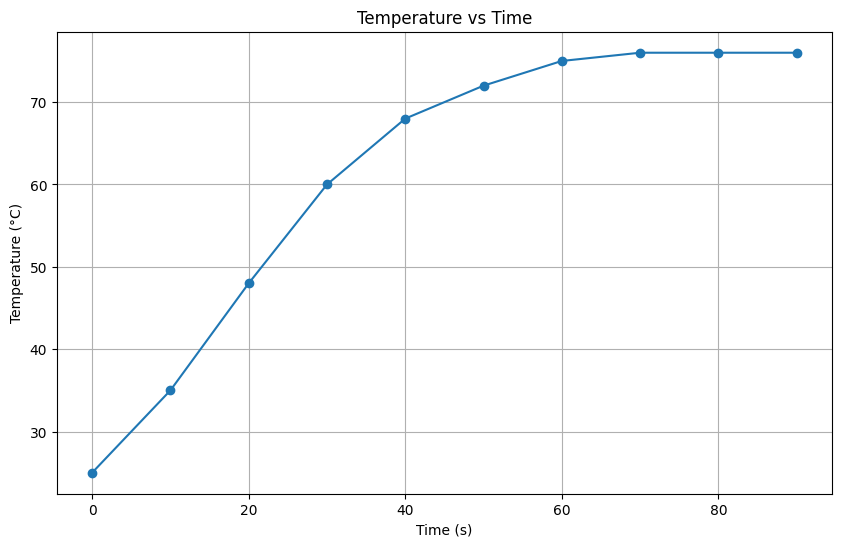

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')

df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
plt.plot(df["Time (s)"],df["Temperature (°C)"], marker='o', linestyle='-')
plt.title("Temperature vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()

b)

Increasing Temperature with Time: the temperature increases as time progresses. This indicates that heat is being transferred into the system, causing its temperature to rise. initially, there is a high rate of heating as the temperature rises steadily with unit time until at 40s.

Slowing Rate of Heating (Approaching Equilibrium):From time 40s at 70 degrees, the rate at which the temperature increases starts to decrease over time. The slope becomes less steep over time, approaching a plateau  where the temperature no longer changes significantly.

c)

Situation: Cooling of an engine

When an engine is started, the temperature rises with time until the cooling mechanisms kick in to maintain the temperature at equilibrium. The cooling mechanisms include the radiator, fans and cooling fluid.
If the predetermined equilibrium is passed and the temperature continues to rise, this lets the engineers know there is a problem with the cooling system or if the temperature drops too early and becomes too low, the engineers know that the cooling system has a problem.

The visualization enables the engineers to diagnose the problems early optimizing the engine's performance and reliability.


### Question 4: ODE Simulation of Real System (20 marks) 


a)

Iteration 1: Compute y1
    t1=t0+h=0+0.5=0.5
y1=y0+h⋅f(t0,y0)=100+0.5⋅(0.5⋅100)
y1=100+0.5⋅50=100+25

=125

Iteration 2: Compute y2​

t2=t1+h=0.5+0.5=1.0
y2=y1+h⋅f(t1,y1)=125+0.5⋅(0.5⋅125)
y2=125+0.5⋅62.5=125+31.25

=156.25

Iteration 3: Compute y3
 
t3=t2​+h=1.0+0.5=1.5
y3=y2 +h⋅f(t2 ,y2)=156.25+0.5⋅(0.5⋅156.25)
y3 =156.25+0.5⋅78.125=156.25+39.0625

=195.3125

Iteration 4: Compute y4
 
t4=t3​+h=1.5+0.5=2.0
y4=y3 +h⋅f(t3 ,y3 )=195.3125+0.5⋅(0.5⋅195.3125)
y4 =195.3125+0.5⋅97.65625=195.3125+48.828125

=244.140625

b)

In [82]:
def euler_method(f, y0, t0, n, h):
    t = t0
    y = y0
    results = [[t, y]]
    for _ in range(n):
        y += h * f(t, y)
        t += h
        results.append([t, y])
    
    return results
def f(t, y):
    return 0.5*y
y0 = 100
h=0.5
t0 = 0
n = 4
results = euler_method(f, y0, t0, n, h)

for t, y in results:
    print(f"t = {t}, y = {y}")


t = 0, y = 100
t = 0.5, y = 125.0
t = 1.0, y = 156.25
t = 1.5, y = 195.3125
t = 2.0, y = 244.140625


c)

Limitations or Euler's Method:

Low Accuracy: it is a first-order method,thus its accuracy is directly proportional to the step size h.A large step size can lead to significant errors in the approximation. To achieve reasonable accuracy, very small step sizes might be required,but this results in increased computational cost. Errors might accumulate from each step size resulting in inaccurate results.

Instability for certain problems: certain differential equations like stiff ones, which have varying time scales.It would require extremely small step sizes which can be computationally impractical or expensive.


Alternative method:

Fourth-Order Runge-Kuta method:a higher order method providing better balance between accuracy and computational cost.